## Swiggy’s Restaurant Recommendation System using K Means Clustering


## 1. Data Information


a: Id
b: Name of Resturant 
c: City
d: Rating
d: Rating_Count (Too few rating, 20+ rating, 50+ rating, 500+ rating, 1K+ rating, 5K+ rating, 10K+ rating)
e: Cost
f: Cuisine
g: lic_no
h: link
i: address
j: menu

## 2. Data Cleaning


1. Duplicates removal
2. Converting the rating column values to numerical values
3. Converting the rating_count column values to numerical values
4. Null values are dropped
5. Save the cleaned dataset 

## Import Package


In [1]:
import numpy as np
import pandas as pd

In [2]:
a = pd.read_csv('swiggy.csv') ####   How to read the dataframe


In [3]:
a.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [4]:
df = a.copy() ## make a copy of athe original dataset

In [5]:
df.head() ## display the dataframe

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [6]:
df.shape

(148541, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [8]:
df.isna().sum() ## identify the null value

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [9]:
# To remove the duplicate values from the dataset

df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [11]:
# Count the "--" values

count = (df["rating"] == "--").sum()
print(count)

87014


In [12]:
# Cleaning the data in rating column

df["rating"] = df["rating"].replace("--", np.nan)
df["rating"] = df["rating"].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148541 non-null  int64  
 1   name          148455 non-null  object 
 2   city          148541 non-null  object 
 3   rating        61441 non-null   float64
 4   rating_count  148455 non-null  object 
 5   cost          148410 non-null  object 
 6   cuisine       148442 non-null  object 
 7   lic_no        148312 non-null  object 
 8   link          148541 non-null  object 
 9   address       148455 non-null  object 
 10  menu          148541 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 12.5+ MB


In [14]:
# Drop the null values in the following column first.

df.dropna(subset=["rating", "city", "cost", "cuisine","rating_count"], inplace=True)

In [15]:
df.isnull().sum()

id               0
name             0
city             0
rating           0
rating_count     0
cost             0
cuisine          0
lic_no          78
link             0
address          0
menu             0
dtype: int64

In [16]:
# Drop the null values in tthe lic_no columns too

df.dropna(subset=["lic_no"], inplace=True)

In [17]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61343 entries, 1 to 148521
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            61343 non-null  int64  
 1   name          61343 non-null  object 
 2   city          61343 non-null  object 
 3   rating        61343 non-null  float64
 4   rating_count  61343 non-null  object 
 5   cost          61343 non-null  object 
 6   cuisine       61343 non-null  object 
 7   lic_no        61343 non-null  object 
 8   link          61343 non-null  object 
 9   address       61343 non-null  object 
 10  menu          61343 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 5.6+ MB


In [19]:
# Drop the unnecessary columns in the dataset

df.drop(columns=["lic_no", "link", "address", "menu", "id"], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61343 entries, 1 to 148521
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61343 non-null  object 
 1   city          61343 non-null  object 
 2   rating        61343 non-null  float64
 3   rating_count  61343 non-null  object 
 4   cost          61343 non-null  object 
 5   cuisine       61343 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.3+ MB


In [21]:
df.head()

,name,city,rating,rating_count,cost,cuisine
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
5,Sam Uncle,Abohar,3.6,20+ ratings,₹ 200,Continental
6,shere punjab veg,Abohar,4.0,100+ ratings,₹ 150,North Indian


In [22]:
df["cost"] = df["cost"].str.replace("₹", "").astype('int64') 

In [23]:
df['rating_count'] = df['rating_count'].replace({'20+ ratings':20, '100+ ratings':100, '50+ ratings':50,'500+ ratings':500,'1K+ ratings':1000,'5K+ ratings':5000,'10K+ ratings':10000})

C:\Users\kshan\AppData\Local\Temp\ipykernel_10520\1467869294.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rating_count'] = df['rating_count'].replace({'20+ ratings':20, '100+ ratings':100, '50+ ratings':50,'500+ ratings':500,'1K+ ratings':1000,'5K+ ratings':5000,'10K+ ratings':10000})


In [24]:
## Reset the index
df.reset_index(drop = True, inplace = True)

In [25]:
df.to_csv('cleaned_swiggy.csv', index = False)

## Hence the Dataset has been prepared for preprocessing!

## 3. Data Preprocessing


In this project, we have done One-Hot-Encoding method.

In [26]:
df1 = pd.read_csv("cleaned_swiggy.csv")

In [27]:
df1.shape

(61343, 6)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61343 non-null  object 
 1   city          61343 non-null  object 
 2   rating        61343 non-null  float64
 3   rating_count  61343 non-null  int64  
 4   cost          61343 non-null  int64  
 5   cuisine       61343 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.8+ MB


In [29]:
df1.describe()

,rating,rating_count,cost
count,61343.000000,61343.000000,61343.000000
mean,3.894513,141.087492,297.649512
std,0.460089,333.122779,170.751818
min,1.000000,20.000000,1.000000
25%,3.700000,20.000000,200.000000
50%,4.000000,50.000000,250.000000
75%,4.200000,100.000000,350.000000
max,5.000000,10000.000000,3000.000000


In [30]:
df1.head()

,name,city,rating,rating_count,cost,cuisine
0,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery"
1,theka coffee desi,Abohar,3.8,100,100,Beverages
2,Singh Hut,Abohar,3.7,20,250,"Fast Food,Indian"
3,Sam Uncle,Abohar,3.6,20,200,Continental
4,shere punjab veg,Abohar,4.0,100,150,North Indian


In [31]:
top_20_cities = df1['city'].value_counts().head(20).index
top_20_cities


Index(['Bikaner', 'Indiranagar,Bangalore', 'Noida-1', 'Koramangala,Bangalore',
       'HSR,Bangalore', 'BTM,Bangalore', 'Greater Kailash 2,Delhi',
       'Whitefield,Bangalore', 'Electronic City,Bangalore',
       'Bandra West,Mumbai', 'Kammanahalli/Kalyan Nagar,Bangalore',
       'Madhapur,Hyderabad', 'Kukatpally,Hyderabad', 'sohna road,Gurgaon',
       'Vashi,Mumbai', 'Viman Nagar,Pune', 'Patna', 'Powai,Mumbai',
       'Banjara Hills,Hyderabad', 'Arekere,Bangalore'],
      dtype='object', name='city')

In [32]:
df1["city"] = df1["city"].apply(lambda x: x if x in top_20_cities else 'Other City')

In [33]:
df1["city"].value_counts()

city
Other City                             52856
Bikaner                                  849
Indiranagar,Bangalore                    601
Noida-1                                  544
Koramangala,Bangalore                    483
HSR,Bangalore                            445
BTM,Bangalore                            434
Greater Kailash 2,Delhi                  414
Whitefield,Bangalore                     400
Electronic City,Bangalore                395
Bandra West,Mumbai                       391
Kammanahalli/Kalyan Nagar,Bangalore      376
Madhapur,Hyderabad                       371
Kukatpally,Hyderabad                     371
sohna road,Gurgaon                       366
Vashi,Mumbai                             355
Viman Nagar,Pune                         350
Patna                                    340
Powai,Mumbai                             336
Banjara Hills,Hyderabad                  334
Arekere,Bangalore                        332
Name: count, dtype: int64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

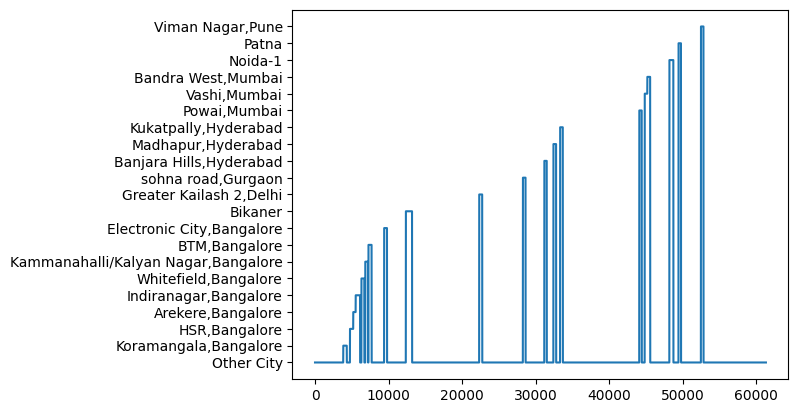

In [35]:
plt.plot(df1["city"])
plt.show()

In [36]:
# To get the Top 20 for Cuisine column

top_100_cuisines = df1["cuisine"].value_counts().nlargest(100).index
top_100_cuisines

Index(['North Indian,Chinese', 'Indian', 'North Indian', 'Indian,Chinese',
       'South Indian', 'Chinese', 'Pizzas', 'Bakery,Desserts',
       'Ice Cream,Desserts', 'Chinese,North Indian',
       'South Indian,North Indian', 'North Indian,Punjabi',
       'North Indian,South Indian', 'Biryani,North Indian', 'Chinese,Indian',
       'Biryani', 'Beverages', 'Biryani,Chinese', 'Bakery',
       'North Indian,Biryani', 'Desserts', 'Fast Food', 'Desserts,Ice Cream',
       'South Indian,Chinese', 'Pizzas,Italian', 'Biryani,Mughlai',
       'North Indian,Indian', 'Ice Cream', 'Desserts,Bakery',
       'Desserts,Beverages', 'Fast Food,Snacks', 'Beverages,Desserts',
       'Biryani,Indian', 'North Indian,Mughlai', 'American,Snacks', 'Snacks',
       'Chinese,Asian', 'Beverages,Snacks', 'Chinese,South Indian',
       'Indian,North Indian', 'Chinese,Thai', 'Biryani,Hyderabadi',
       'Chinese,Fast Food', 'North Indian,Tandoor', 'North Indian,Snacks',
       'Sweets,Snacks', 'American', 'Indian

In [37]:
df1["cuisine"] = df1["cuisine"].apply(lambda x: x if x in top_100_cuisines else 'Other Cuisine')

In [38]:
df1["cuisine"].value_counts()

cuisine
Other Cuisine           16697
North Indian,Chinese     2907
Indian                   1927
North Indian             1869
Indian,Chinese           1825
                        ...  
Andhra,Biryani            121
Ice Cream,Bakery          120
Tibetan,Healthy Food      120
Indian,Tandoor            116
Fast Food,Chinese         115
Name: count, Length: 101, dtype: int64

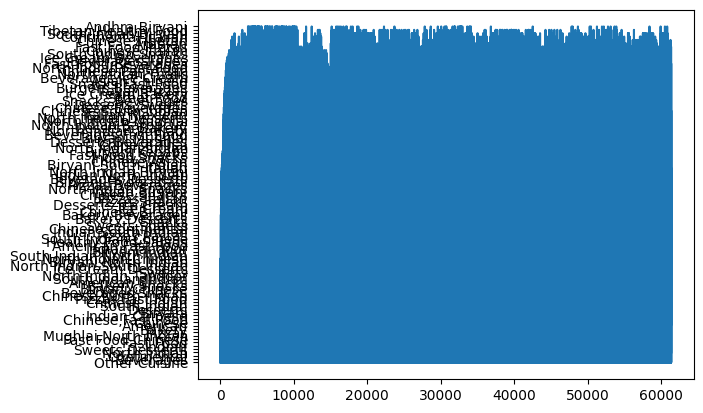

In [39]:
plt.plot(df1["cuisine"])
plt.show()

In [40]:
# After taking the top 20 Cities and Cuisines, the total no. of categories

print(df1['city'].nunique())

print(df1['cuisine'].nunique())

21
101


In [41]:
df1.shape

(61343, 6)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61343 non-null  object 
 1   city          61343 non-null  object 
 2   rating        61343 non-null  float64
 3   rating_count  61343 non-null  int64  
 4   cost          61343 non-null  int64  
 5   cuisine       61343 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.8+ MB


In [43]:
## Import the package of One Hot Encoding
from sklearn.preprocessing import OneHotEncoder


In [44]:
# One-Hot Encoding for the categorical columns in the dataset

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [45]:
# Select features from the dataset

categorical_features = ['city', 'cuisine']
numerical_features = ['rating', 'rating_count', 'cost']

In [46]:
encoded_cat = encoder.fit_transform(df1[categorical_features])

In [47]:
encoded_cat.shape

(61343, 122)

In [48]:
# Create encoded DataFrame

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(categorical_features)
)

In [49]:
# Combine both the numerical + encoded categorical columns

encoded_df = pd.concat([df1[numerical_features], encoded_cat_df], axis=1)

In [50]:
encoded_df.shape

(61343, 125)

In [51]:
## Save the encoded data
encoded_df.to_csv('encoded_data.csv', index = False)

In [52]:
# Save the encoder dataset

import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

## Hence the Encoded Data and Pickel Encoder saved

## 4. K MEANS CLUSTERING

 To predict the resturant recommendation by Unsupervised Learning

In [53]:
## Importing the packages for K Means
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

In [54]:
df2=encoded_df.iloc[:,:] 

## Selecting the K Cluster and Plotting  with Elbow Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

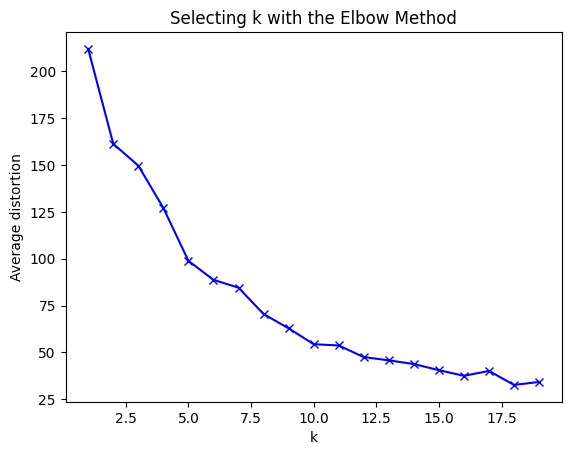

In [55]:

from scipy.spatial.distance import cdist
clusters=range(1,20)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2)
    prediction=model.predict(df2)
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Taking the cluster = 20 Group

In [56]:

final_model=KMeans(20)
final_model.fit(df2)
prediction=final_model.predict(df2)

#Append the prediction 
encoded_df["GROUP"] = prediction
df2["GROUP"] = prediction
print("Groups Assigned : \n")
#df_final.head()

Groups Assigned : 



In [57]:
encoded_df['GROUP'].value_counts() ## Taking the value counts of Group

GROUP
0     11524
14     9208
12     6847
10     6630
7      5869
18     4366
9      3321
6      3063
3      2928
1      2019
16     1732
11     1204
4      1114
15      717
19      295
17      244
8       124
2        98
13       25
5        15
Name: count, dtype: int64

In [58]:
encoded_df.groupby(['GROUP'])['rating_count'].value_counts()

GROUP  rating_count
0      20              7478
       50              4046
1      1000            2019
2      5000              98
3      500             2928
4      100              454
       20               387
       50               273
5      10000             15
6      100             1468
       20               905
       50               690
7      20              3215
       50              1758
       100              896
8      20                51
       100               37
       50                33
       500                3
9      100             3321
10     100             6630
11     500             1204
12     100             6847
13     20                15
       50                 6
       100                3
       500                1
14     20              6060
       50              3148
15     1000             717
16     100              729
       20               598
       50               405
17     500              243
       1000               1


## Clustering according to  Group 

In [59]:
s = encoded_df.iloc[:,:].groupby(['GROUP']).mean()

In [60]:
s

,rating,rating_count,cost,"city_Arekere,Bangalore","city_BTM,Bangalore","city_Bandra West,Mumbai","city_Banjara Hills,Hyderabad",city_Bikaner,"city_Electronic City,Bangalore","city_Greater Kailash 2,Delhi",...,"cuisine_South Indian,Biryani","cuisine_South Indian,Chinese","cuisine_South Indian,Indian","cuisine_South Indian,North Indian","cuisine_South Indian,Snacks",cuisine_Street Food,cuisine_Sweets,"cuisine_Sweets,Desserts","cuisine_Sweets,Snacks","cuisine_Tibetan,Healthy Food"
GROUP,,,,,,,,,,,,,,,,,,,,,
0,3.783721,30.532801,278.108122,0.005640,0.007549,0.004859,0.003384,0.010066,0.009111,0.006074,...,0.003818,0.009372,0.003992,0.008417,0.001909,0.001302,0.003471,0.001215,0.004512,0.001215
1,4.037296,1000.000000,247.004953,0.004458,0.008915,0.000991,0.016345,0.019812,0.003962,0.003962,...,0.003962,0.015849,0.005448,0.071818,0.000495,0.000495,0.001486,0.006439,0.006439,0.004458
2,4.086735,5000.000000,311.734694,0.000000,0.000000,0.000000,0.051020,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010204,0.071429,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000
3,4.022712,500.000000,225.092896,0.007514,0.007855,0.003415,0.005806,0.011954,0.005806,0.005123,...,0.006148,0.015027,0.006148,0.025956,0.002732,0.001025,0.005123,0.005806,0.005806,0.009221
4,4.159605,59.955117,877.091562,0.004488,0.002693,0.036804,0.015260,0.050269,0.005386,0.020646,...,0.000000,0.000898,0.003591,0.002693,0.000898,0.000898,0.000000,0.000898,0.000000,0.000000
5,3.813333,10000.000000,333.333333,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,4.012733,65.099576,494.595168,0.004244,0.003591,0.016324,0.007835,0.024812,0.008815,0.017630,...,0.003265,0.004571,0.004897,0.012080,0.000000,0.000979,0.001959,0.003591,0.001632,0.000000
7,3.827858,41.199523,125.689044,0.005964,0.008519,0.001533,0.002556,0.006134,0.007156,0.005452,...,0.003237,0.010053,0.004600,0.009030,0.005282,0.007838,0.013631,0.001874,0.009371,0.000000
8,4.205645,63.467742,1520.967742,0.008065,0.000000,0.040323,0.024194,0.040323,0.000000,0.008065,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 5. Reccomendation Methdology

In [61]:
### Take the cleaned_swiggy and encoded_data for reccommendation

cleaned_df = pd.read_csv("cleaned_swiggy.csv")
encoded_df = pd.read_csv("encoded_data.csv")

with open("encoder.pkl", "rb") as f:
    encoder = pickle.load(f)



In [62]:
### Take a K Means for n_cluster = 20
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(encoded_df)

encoded_df['cluster'] = kmeans.labels_


In [63]:
cleaned_df['cluster'] = encoded_df['cluster'] ###


Taking User Input

In [64]:
user_city = "Patna"
user_cuisine = "Chinese"
user_rating = 4.0
user_rating_count = 100
user_cost = 300



In [65]:
user_cat = encoder.transform(pd.DataFrame([{
    'city': user_city,
    'cuisine': user_cuisine
}]))

user_vector = np.hstack([
    user_cat,
    [[user_rating, user_rating_count, user_cost]]
])


In [66]:
user_cluster = kmeans.predict(user_vector)[0]


C:\Users\kshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [67]:
cluster_indices = encoded_df[
    encoded_df['cluster'] == user_cluster
].index


In [68]:
recommended_df = cleaned_df.loc[cluster_indices]


In [69]:
recommended_df = recommended_df[
    (recommended_df['city'] == user_city) &
    (recommended_df['rating'] >= user_rating) &
    (recommended_df['cost'] <= user_cost)
]


In [70]:
final_recommendations = recommended_df.sort_values(
    by=['rating', 'rating_count'],
    ascending=False
).head(10)


In [71]:
final_recommendations[['name','city','rating', 'rating_count', 'cost','cuisine','cluster']]

,name,city,rating,rating_count,cost,cuisine,cluster
49597,Slurpy Shakes,Patna,4.6,50,150,"Beverages,Ice Cream",13
49579,Madras Dosa House,Patna,4.3,50,2,"South Indian,Chinese",13
49612,Meera hut,Patna,4.3,50,2,"North Indian,Fast Food",13
49776,Open with Smile,Patna,4.2,20,150,"Chinese,North Indian",13
49596,Sundae Everyday Ice Creams,Patna,4.1,20,100,"Ice Cream,Desserts",13
49702,Momo's World Cafe,Patna,4.0,20,100,"Chinese,Snacks",13


## Hence complete the whole project